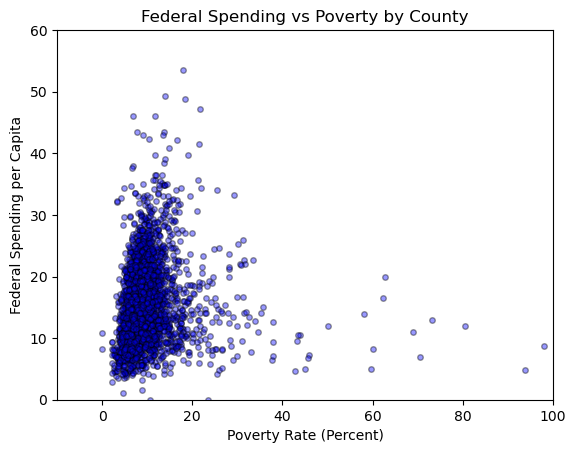

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
county = pd.read_csv('https://raw.githubusercontent.com/BIDDL3/Examining-Data/main/county.txt', sep='\t', encoding='utf-8')
county.shape
county.columns
county.state.unique()
county.state.nunique()
county.describe().round(3)
county.pop2000.mean()
# Create data
x = county.fed_spend
y = county.poverty
colors = 'Blue'
area = np.pi*5

plt.axis([-10, 100, 0, 60])

# Plot
plt.scatter(x, y, s=area, c=colors, alpha=0.4, edgecolors='black')

plt.title('Federal Spending vs Poverty by County')
plt.ylabel('Federal Spending per Capita')
plt.xlabel('Poverty Rate (Percent)')
plt.show()


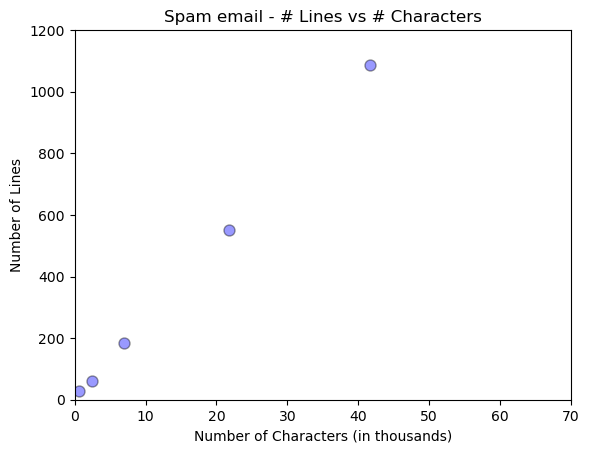

In [5]:
import pandas as pd
dbe = pd.read_csv('email50.csv', sep=",", nrows = 5)
dbe.shape
dbe.head()
# Create data
x = dbe.num_char
y = dbe.line_breaks

colors = "Blue"
area = np.pi*20
plt.axis([0, 70, 0, 1200])

# Plot
plt.scatter(x, y, s=area, c=colors, alpha=0.4, edgecolors='black')
plt.title('Spam email - # Lines vs # Characters')
plt.ylabel('Number of Lines')
plt.xlabel('Number of Characters (in thousands)')
plt.show()

In [12]:
# preparacion de fuente de datos a DataSET

import pandas as pd
import requests
from io import StringIO

# Descargar el archivo movies.dat desde el repositorio
url = 'https://raw.githubusercontent.com/BIDDL3/PRE-PROCESSING-DATA/main/movies.dat'
response = requests.get(url).content.decode('ISO-8859-1')

# Preprocesar y adecuar el archivo para convertirlo en un DataFrame
lines = response.strip().split('\n')
data = [line.split('::') for line in lines]
df = pd.DataFrame(data, columns=['PeliculaID', 'Nombre_Pelicula', 'Genero'])
df['PeliculaID'] = pd.to_numeric(df['PeliculaID'])

# Mostrar los primeros registros del DataFrame
df.head()

,PeliculaID,Nombre_Pelicula,Genero
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [19]:
# extraer un solo genero de la columna de genero, probando alternativa 1 separando generos en diferentes columnas

import pandas as pd
import requests
from io import StringIO

# Descargar el archivo movies.dat desde el repositorio
url = 'https://raw.githubusercontent.com/BIDDL3/PRE-PROCESSING-DATA/main/movies.dat'
response = requests.get(url).content.decode('ISO-8859-1')

# Preprocesar y adecuar el archivo para convertirlo en un DataFrame
lines = response.strip().split('\n')
data = [line.split('::') for line in lines]
df = pd.DataFrame(data, columns=['PeliculaID', 'Nombre_Pelicula', 'Genero'])
df['PeliculaID'] = pd.to_numeric(df['PeliculaID'])

# Dividir y expandir los datos de la columna "Genres"
df_expanded = df['Genero'].str.split('|', expand=True)
df_expanded.columns = [f'Genero_{i+1}' for i in range(df_expanded.shape[1])]

# Combinar el DataFrame original con los datos expandidos de "Genres"
df = pd.concat([df, df_expanded], axis=1)

# Eliminar la columna original "Genres"
df.drop('Genero', axis=1, inplace=True)

# Mostrar los primeros registros del DataFrame
df.head()

,PeliculaID,Nombre_Pelicula,Genero_1,Genero_2,Genero_3,Genero_4,Genero_5,Genero_6
0,1,Toy Story (1995),Animation,Children's,Comedy,None,None,None
1,2,Jumanji (1995),Adventure,Children's,Fantasy,None,None,None
2,3,Grumpier Old Men (1995),Comedy,Romance,None,None,None,None
3,4,Waiting to Exhale (1995),Comedy,Drama,None,None,None,None
4,5,Father of the Bride Part II (1995),Comedy,None,None,None,None,None


In [22]:
# solucion final de DataSET dejando un solo genero por fila

import pandas as pd
import requests
from io import StringIO

# Descargar el archivo movies.dat desde el repositorio
url = 'https://raw.githubusercontent.com/BIDDL3/PRE-PROCESSING-DATA/main/movies.dat'
response = requests.get(url).content.decode('ISO-8859-1')

# Preprocesar y adecuar el archivo para convertirlo en un DataFrame
lines = response.strip().split('\n')
data = [line.split('::') for line in lines]
df = pd.DataFrame(data, columns=['PeliculaID', 'Nombre_Pelicula', 'Genero'])
df['PeliculaID'] = pd.to_numeric(df['PeliculaID'])

# Seleccionar un solo género de la columna "Genres"
df['Genero'] = df['Genero'].str.split('|').apply(lambda x: x[0])

# Mostrar los primeros registros del DataFrame
df.head()

,PeliculaID,Nombre_Pelicula,Genero
0,1,Toy Story (1995),Animation
1,2,Jumanji (1995),Adventure
2,3,Grumpier Old Men (1995),Comedy
3,4,Waiting to Exhale (1995),Comedy
4,5,Father of the Bride Part II (1995),Comedy


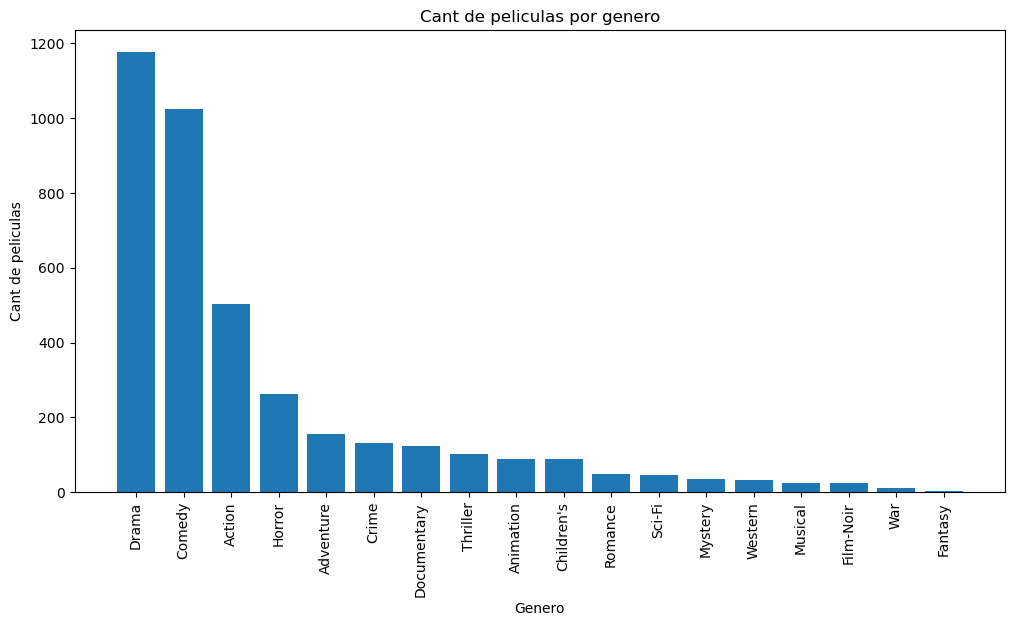

In [24]:
# vamos a genera un grafico de barras para invetariar el numero de peliculas por genero
import pandas as pd
import requests
from io import StringIO
import matplotlib.pyplot as plt

# Descargar el archivo movies.dat desde el repositorio
url = 'https://raw.githubusercontent.com/BIDDL3/PRE-PROCESSING-DATA/main/movies.dat'
response = requests.get(url).content.decode('ISO-8859-1')

# Preprocesar y adecuar el archivo para convertirlo en un DataFrame
lines = response.strip().split('\n')
data = [line.split('::') for line in lines]
df = pd.DataFrame(data, columns=['PeliculaID', 'Nombre_Pelicula', 'Genero'])
df['PeliculaID'] = pd.to_numeric(df['PeliculaID'])

# Seleccionar un solo género de la columna "Genres"
df['Genero'] = df['Genero'].str.split('|').apply(lambda x: x[0])

#generar grafico
genre_counts = df.groupby('Genero')['Nombre_Pelicula'].count().reset_index()
genre_counts.columns = ['Genero', 'Count']

# Ordenar los géneros por el número de películas en orden descendente
genre_counts = genre_counts.sort_values('Count', ascending=False)

# Configurar el tamaño del gráfico
plt.figure(figsize=(12, 6))

# Crear el gráfico de barras
plt.bar(genre_counts['Genero'], genre_counts['Count'])

# Configurar etiquetas y título
plt.xlabel('Genero')
plt.ylabel('Cant de peliculas')
plt.title('Cant de peliculas por genero')

# Rotar las etiquetas del eje x para una mejor legibilidad
plt.xticks(rotation=90)

# Mostrar el gráfico
plt.show()


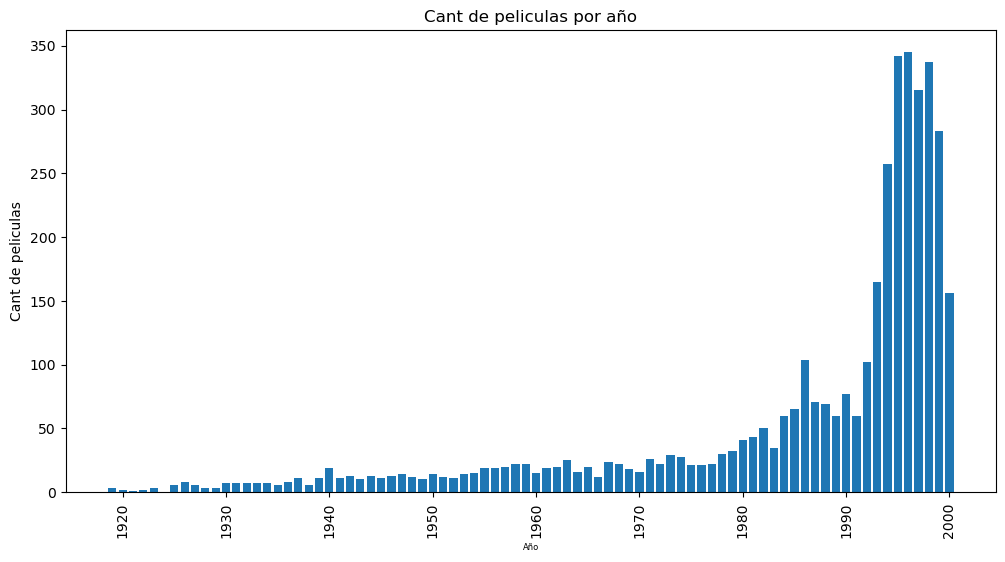

In [35]:
# vamos a extraer el año de la pelicula del campo del nombre para generar un grafico agrupado
import pandas as pd
import requests
from io import StringIO
import matplotlib.pyplot as plt

# Descargar el archivo movies.dat desde el repositorio
url = 'https://raw.githubusercontent.com/BIDDL3/PRE-PROCESSING-DATA/main/movies.dat'
response = requests.get(url).content.decode('ISO-8859-1')

# Preprocesar y adecuar el archivo para convertirlo en un DataFrame
lines = response.strip().split('\n')
data = [line.split('::') for line in lines]
df = pd.DataFrame(data, columns=['PeliculaID', 'Nombre_Pelicula', 'Genero'])
df['PeliculaID'] = pd.to_numeric(df['PeliculaID'])

# Seleccionar un solo género de la columna "Genres"
df['Genero'] = df['Genero'].str.split('|').apply(lambda x: x[0])

# Extraer el año de la columna "Nombre pelicula"
df['Año'] = df['Nombre_Pelicula'].str[-5:-1].astype(int)

# Calcular el recuento de películas por año
year_counts = df['Año'].value_counts().sort_index()

# Configurar el tamaño del gráfico
plt.figure(figsize=(12, 6))

# Crear el gráfico de barras
plt.bar(year_counts.index, year_counts.values)

# Configurar etiquetas y título
plt.xlabel('Año', fontsize=6)
plt.ylabel('Cant de peliculas')
plt.title('Cant de peliculas por año')

# Rotar las etiquetas del eje x en 90 grados
plt.xticks(rotation=90)

# Mostrar el gráfico
plt.show()